# Assignment 1: Getting Started with NetworkX
## Spring 2023

In [221]:
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import numpy as np
import scipy as sp
import itertools
import pandas as pd

# Change this to your GTID username
gtid = "jfunk33"

## Part 1- Intro to NetworkX [20 points]
***
### Generating graphs with NetworkX 
### 1.1

In [17]:
#Implement your code and show the visualization

def practice_graphs():
    
    """
    Returns:
    
    G: NetworkX graph object
    """
    
    # This line is a placeholder
    G = nx.Graph()
    G.add_nodes_from([0,1,2,3,4,5,6,7,8])
    G.add_edges_from([(1, 2), 
                      (1, 3),
                      (2, 3),
                      (4, 5),
                      (4, 6),
                      (4, 7),
                      (4, 8)])
    pos=nx.spring_layout(G, k=3, center=[4,1])
    
    return G, pos

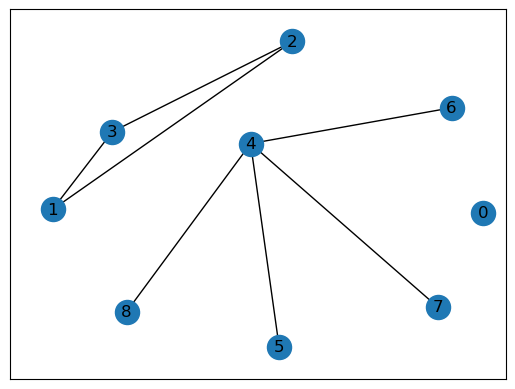

In [19]:
g, pos = practice_graphs()
nx.draw_networkx(g, pos, with_labels=True)

### 1.2

In [342]:
# Write a function that returns the 3 10-node toy networks from the assignment pdf

def create_toy_graphs():
    
    """
    
    Returns:
    cycle: a networkx graph object meeting the requirements of a cycle
    clique: a networkx graph object meeting the requirements of a clique
    star: a networkx graph object meeting the requirements of a star network
    
    """
    
    #These lines are placeholders
    cycle = nx.cycle_graph(10)
    clique = nx.complete_graph(10)
    star = nx.star_graph(10)
    
    return cycle, clique, star


# Write a function that will return the leading eigenvalue of the adjacency matrix of a given network.

def calculate_leading_eigenvalue(G):
    """
    Inputs:
    G: NetworkX graph object
    
    Returns:
    eig (float): leading eigenvalue of the adjacency matrix 
    
    """
    
    # This is a placeholder
    A = nx.to_numpy_array(G)
    eig = np.linalg.eig(A)
    eig = list(eig[0])
    eig = [abs(ele) for ele in eig]
    
    return max(eig)
    
    

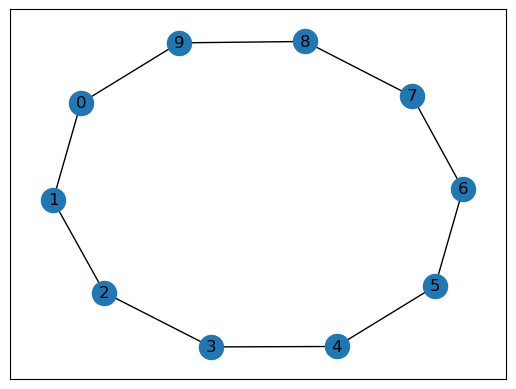

In [35]:
cycle, clique, star = create_toy_graphs()
nx.draw_networkx(cycle, with_labels=True)

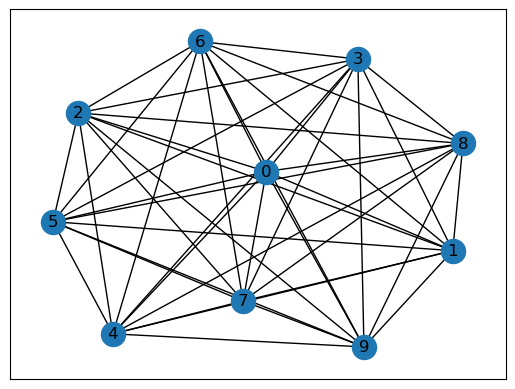

In [36]:
nx.draw_networkx(clique, with_labels=True)

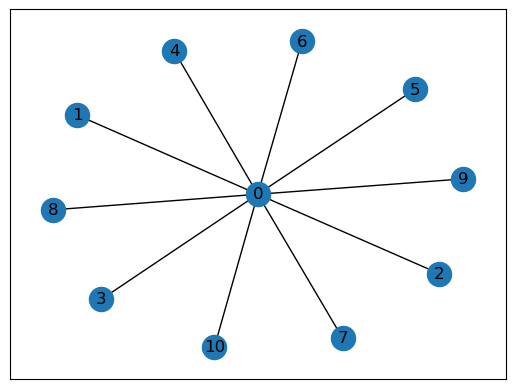

In [37]:
nx.draw_networkx(star, with_labels=True)

In [343]:
cycle_eig = calculate_leading_eigenvalue(cycle)
clique_eig = calculate_leading_eigenvalue(clique)
star_eig = calculate_leading_eigenvalue(star)
print(cycle_eig)
print(clique_eig)
print(star_eig)

2.0000000000000027
8.999999999999998
3.1622776601683804


In [55]:
print("Cycle avg degree", sum(list(dict(cycle.degree).values())) / len(list(dict(cycle.degree).values())))
print("Cycle max degree", max(list(dict(cycle.degree).values())))
print("Cycle leading eigenvalue", 2)
print("Clique avg degree", sum(list(dict(clique.degree).values())) / len(list(dict(cycle.degree).values())))
print("Clique max degree", max(list(dict(clique.degree).values())))
print("Clique leading eigenvalue", 9)
print("Star avg degree", sum(list(dict(star.degree).values())) / len(list(dict(cycle.degree).values())))
print("Star max degree", max(list(dict(star.degree).values())))
print("Star leading eigenvalue", 3.16227766)

Cycle avg degree 2.0
Cycle max degree 2
Cycle leading eigenvalue 2
Clique avg degree 9.0
Clique max degree 9
Clique leading eigenvalue 9
Star avg degree 2.0
Star max degree 10
Star leading eigenvalue 3.16227766


In networks with a large maximum degree, the largest eigenvalue tends to be larger. This is because highly connected nodes contribute to the dominant eigenvalue of the adjacency matrix.

In networks with a higher average degree, the largest eigenvalue is expected to be larger. This is because a higher average degree implies a more connected network, which can lead to a larger dominant eigenvalue. However, a star graph might be an extreme example as it does not fit within the trend

### Importing Map Data 
### 1.3

In [65]:
# Write a function that will return the number of nodes and edges in the map, as well as the number of 
# pairs of cities that are less than 50 miles apart?

def cities_map_analysis(G):
    """
    Input
    G: NetworkX Graph object
    
    Output
    node_count (int): number of nodes
    edge_count (int): number of edges
    city_count (int): number of city pairs within 50 miles of each other
    """
    
    # these are placeholders
    node_count = G.number_of_nodes()
    edge_count = G.number_of_edges()
    city_count = len([(u,v) for u,v,e in G.edges(data=True) if e['weight'] > 50])
    
    return node_count, edge_count, city_count
    

In [101]:
G = nx.read_graphml("cities_data.graphml")
n,e,c = cities_map_analysis(G)
print(n)
print(e)
print(c)

128
8128
8119


### 1.4

In [263]:
#Implement your code and show the visualization of Question 4
def cities_within_100(G, city_list):
    '''
    Input
    G: NetworkX graph object
    city_list: list of strings (names of cities in G)

    Output
    S: subgraph of G that only contains edges between cities in “city_list” and directly neighboring cities that are less than 100 miles away
    '''

    # This is a placeholder
#     S = nx.Graph()
    print(city_list)
    S = nx.Graph(((u, v, e) for u,v,e in G.edges(data=True) if (u in city_list or v in city_list) and e['weight'] < 100))
    print(S.nodes(data=True))
    
    return S

['Rochester, NY', 'Tacoma, WA']
[('Tacoma, WA', {}), ('Seattle, WA', {}), ('Syracuse, NY', {}), ('Rochester, NY', {})]


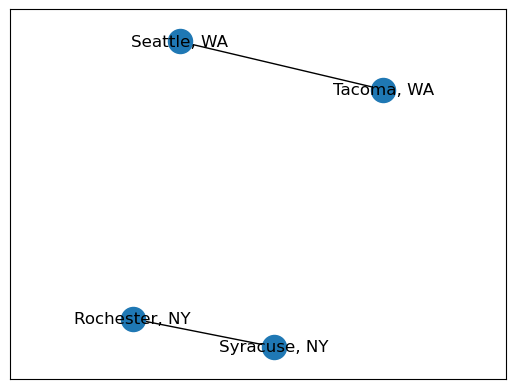

In [264]:
# Draw the visualization of your graph here
S = cities_within_100(G, ["Rochester, NY","Tacoma, WA"])
pos=nx.spring_layout(S, k=5)

nx.draw_networkx(S, pos, with_labels=True)
plt.margins(x=0.4)

['Toledo, OH', 'Stockton, CA', 'San Francisco, CA']
[('Toledo, OH', {}), ('Sandusky, OH', {}), ('Stockton, CA', {}), ('San Jose, CA', {}), ('San Francisco, CA', {}), ('Sacramento, CA', {}), ('Santa Rosa, CA', {})]


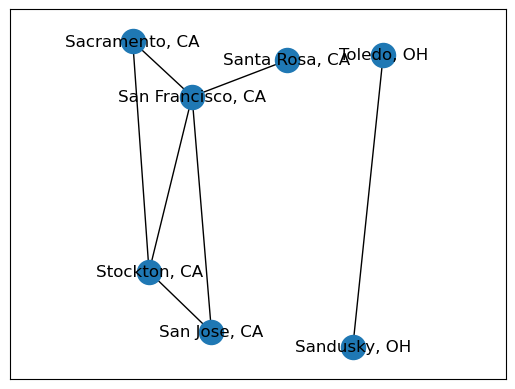

In [265]:
S2 = cities_within_100(G, ["Toledo, OH", "Stockton, CA", "San Francisco, CA"])
pos2 = nx.spring_layout(S2, k=5)
nx.draw_networkx(S2, pos2, with_labels=True)
plt.margins(x=0.4)

### Part 2 - Random Walks of Les Misérables [20 points]
### 2.1

In [113]:
# Write a function that will return if the graph connected or unconnected.

def les_mis_connected(G):
    """
    Returns:
    les_mis_connected (Boolean): whether the graph is connected or not
    
    """
    
    return nx.is_connected(G)

In [111]:
les_mis = nx.read_gml("lesmis_data.gml")

In [145]:
les_mis.edges(data=True)

EdgeDataView([('Myriel', 'Napoleon', {'value': 1}), ('Myriel', 'MlleBaptistine', {'value': 8}), ('Myriel', 'MmeMagloire', {'value': 10}), ('Myriel', 'CountessDeLo', {'value': 1}), ('Myriel', 'Geborand', {'value': 1}), ('Myriel', 'Champtercier', {'value': 1}), ('Myriel', 'Cravatte', {'value': 1}), ('Myriel', 'Count', {'value': 2}), ('Myriel', 'OldMan', {'value': 1}), ('Myriel', 'Valjean', {'value': 5}), ('MlleBaptistine', 'MmeMagloire', {'value': 6}), ('MlleBaptistine', 'Valjean', {'value': 3}), ('MmeMagloire', 'Valjean', {'value': 3}), ('Labarre', 'Valjean', {'value': 1}), ('Valjean', 'Marguerite', {'value': 1}), ('Valjean', 'MmeDeR', {'value': 1}), ('Valjean', 'Isabeau', {'value': 1}), ('Valjean', 'Gervais', {'value': 1}), ('Valjean', 'Fantine', {'value': 9}), ('Valjean', 'MmeThenardier', {'value': 7}), ('Valjean', 'Thenardier', {'value': 12}), ('Valjean', 'Cosette', {'value': 31}), ('Valjean', 'Javert', {'value': 17}), ('Valjean', 'Fauchelevent', {'value': 8}), ('Valjean', 'Bamataboi

In [114]:
les_mis_connected(les_mis)

True

I used the networkx is_connected() function to see if the les mis data is a connected graph. The following line of code is how networkx determines if a graph is connected: `return len(set(_plain_bfs(G, next(G.nodes_iter())))) == len(G)`. Networkx uses a breadth first search method to see if a graph is connected. BFS starts at a source node and traverses the graph through layers, moving on to then next layer after all neighbors of source have been checked. BFS marks nodes as visited as it traverses through the graph. The line of code in the networkx function shows that it simply determines if the graph is connected by using BFS to traverse the nodes of the graph, and if the number of nodes traversed is equal to the number of nodes in the graph, then the graph is connected.


### 2.2

In [258]:
# Implement your code and plot your distribution
# For each pair of nodes in the graph, calculate the shortest path length between them. 
# Calculate the average shortest path length, and the maximum shortest path.

def calculate_average_paths(G):
    """
    Inputs
    G: NetworkX graph object
    
    Returns:
    aspl (float): average shortest path length
    mspl (int): maximum shortest path length
    """
    
    combos = set(itertools.combinations(G.nodes(), 2))
    shortest_paths = []
    for combo in combos:
        shortest_path = nx.shortest_path(G, source=combo[0], target=combo[1])
        shortest_paths.append(len(shortest_path)-1)
    
    
    # These lines are placeholders
    aspl = sum(shortest_paths) / len(shortest_paths)
    mspl = max(shortest_paths)
    
    sns.countplot(x=shortest_paths)
    
    return aspl, mspl

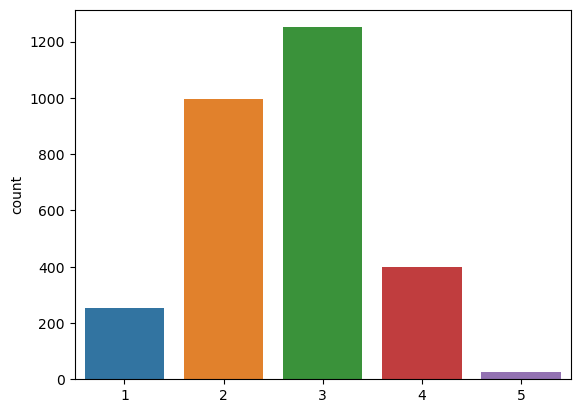

In [259]:
# Plot your results here as specified in the assignment description

_avg, _max = calculate_average_paths(les_mis)


In [260]:
print("avg: ", _avg)
print("max: ", _max)

avg:  2.6411483253588517
max:  5


In [124]:
len(les_mis.nodes())

77


### 2.3

In [299]:
#Implement a function that will calculate the stationary distribution to find the 3 most commonly mentioned characters in the novel


def popular_characters(G):
    
    """
    Inputs:
    G: NetworkX graph object
    
    Returns:
    top_3: List[str]: a list of the string names of the 3 most commonly mentioned characters in the novel
    
    """
    
    A = nx.adjacency_matrix(G, weight='value')
    A = A.todense()
#     print(A)
    A = A.transpose()
    A = np.array(A)
    T = A
#     print(T)
    q0 = [1/len(G.nodes())] * len(G.nodes())
#     print(q0)
    q = np.array(q0)
    for i in range(150):
        q = np.matmul(T, q)
#         print(q)

    popular = pd.DataFrame()
    popular['Character'] = np.array(G.nodes())
    popular['StationaryDistribution'] = q
    popular = popular.sort_values(by=['StationaryDistribution'])
    top_3 = list(popular['Character'].head(3))
        
    
    
    
    
    # This line is a placeholder
#     top_3 = ["George", "P.", "Burdell"]
    
    return top_3


In [187]:
test = nx.DiGraph()
test.add_nodes_from([0,1,2,3])
test.add_weighted_edges_from(
    [
        (0,1,0.7),
        (1,0,0.3),
        (0,2,0.3),
        (2,0,0.3),
        (1,2,0.4),
        (2,1,0.3),
        (1,3,0.3),
        (3,1,0.5),
        (2,3,0.2),
        (3,2,0.2),
        (2,2,0.2),
        (3,3,0.3)
    ]
)

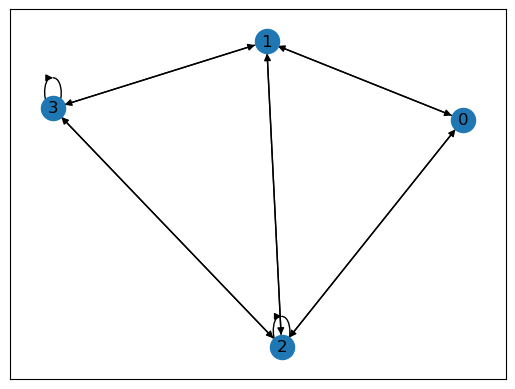

In [150]:
nx.draw_networkx(test, with_labels=True)

In [181]:
test_A = nx.adjacency_matrix(test)
test_A = test_A.todense()
test_A = test_A.transpose()
# test_A = np.array(test_A, dtype = np.float64)
# test_D = np.diag(np.sum(test_A, axis=0))
# test_T = np.dot(np.linalg.inv(test_D),test_A)
# test_T

/var/folders/51/n64xxfwj1k1797dd7bfbl6kr0000gn/T/ipykernel_93637/921809143.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  test_A = nx.adjacency_matrix(test)


In [184]:
np.array(test_A)

array([[0. , 0.3, 0.3, 0. ],
       [0.7, 0. , 0.3, 0.5],
       [0.3, 0.4, 0.2, 0.2],
       [0. , 0.3, 0.2, 0.3]])

In [170]:
test_q = np.array([1/len(test.nodes())] * len(test.nodes()))

In [185]:
np.matmul(np.array(test_A), test_q)

array([0.15 , 0.375, 0.275, 0.2  ])

In [188]:
popular_characters(test)

/var/folders/51/n64xxfwj1k1797dd7bfbl6kr0000gn/T/ipykernel_93637/429981373.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


array([0.18054584, 0.31980406, 0.2820154 , 0.21763471])

In [300]:
popular_characters(les_mis)

/var/folders/51/n64xxfwj1k1797dd7bfbl6kr0000gn/T/ipykernel_93637/3580068510.py:15: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, weight='value')


['Jondrette', 'Napoleon', 'CountessDeLo']

In [219]:
np.array(les_mis.nodes())

array(['Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire',
       'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count',
       'OldMan', 'Labarre', 'Valjean', 'Marguerite', 'MmeDeR', 'Isabeau',
       'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville',
       'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier',
       'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois',
       'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge',
       'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy',
       'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent',
       'Gribier', 'Jondrette', 'MmeBurgon', 'Gavroche', 'Gillenormand',
       'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois',
       'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras',
       'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel',
       'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer',
       'Babet', 'C

In [227]:
popular = pd.DataFrame()
popular['Character'] = np.array(les_mis.nodes())
popular['StationaryDistribution'] = popular_characters(les_mis)
popular.sort_values(by=['StationaryDistribution'])
# popular.head()

/var/folders/51/n64xxfwj1k1797dd7bfbl6kr0000gn/T/ipykernel_93637/2724782456.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, weight='value')


Character  StationaryDistribution
46     Jondrette           4.149735e+266
1       Napoleon           3.580245e+267
4   CountessDeLo           3.580245e+267
5       Geborand           3.580245e+267
6   Champtercier           3.580245e+267
..           ...                     ...
62    Courfeyrac           1.514765e+270
58      Enjolras           1.640411e+270
26       Cosette           2.007221e+270
55        Marius           2.246047e+270
11       Valjean           2.444265e+270

[77 rows x 2 columns]

Most commonly mentioned characters are Jondrette, Napoleon, CountessDeLo

### Part 3 - Components of Drosophila Optic Medulla [20 points]

In [228]:
neurons = nx.read_graphml("drosophila_medulla_data.graphml")

### 3.1

In [251]:
# Write a function to find the weakly connected components of this network, and return how many there are and what percentage of the nodes are in the largest weakly connected component

def weakly_connected(G):
    """
    Inputs
    G: NetworkX graph object
    
    Returns:
    wccs (int): number of weakly connected components in the graph
    wpct (float): percent of nodes in the graph that belong to the largest weakly connected component
    
    """
    
    largest = max(nx.weakly_connected_components(G), key=len)
    
    # These lines are placeholders
    wccs = nx.number_weakly_connected_components(G)
    wpct = len(largest) / len(G.nodes())
    
    return wccs, wpct


In [252]:
wccs, wpct = weakly_connected(neurons)
print('number of weakly connected components in the graph', wccs)
print('percent of nodes in the graph that belong to the largest weakly connected component', wpct)

number of weakly connected components in the graph 6
percent of nodes in the graph that belong to the largest weakly connected component 0.9938236945536215


### 3.2

In [249]:
# Write a function to find the strongly connected components of this network, and return how many there are and what percentage of the nodes are in the largest strongly connected component

def strongly_connected(G):
    """
    Inputs
    G: NetworkX graph object
    
    Returns:
    sccs (int): number of strongly connected components in the graph
    spct (float): percent of nodes in the graph that belong to the largest strongly connected component
    
    """
    
    largest = max(nx.strongly_connected_components(G), key=len)
    
    #These lines are placeholders
    sccs = nx.number_strongly_connected_components(G)
    spct = len(largest) / len(G.nodes())
    
    return sccs, spct
    

In [250]:
sccs, spct = strongly_connected(neurons)
print('number of strongly connected components in the graph', sccs)
print('percent of nodes in the graph that belong to the largest strongly connected component', spct)

number of strongly connected components in the graph 996
percent of nodes in the graph that belong to the largest strongly connected component 0.4407636159460977


### 3.3

In [246]:
# Calculate the average shortest path length and maximum shortest path length of the largest strongly connected component

def scc_shortest_paths(G):
    """
    Inputs
    G: NetworkX graph object
    
    Returns:
    aspl (float): average shortest path length of the largest strongly connected component
    mspl (int): maximum shortest path length of the largest strongly connected component
    
    """
    
    largest = max(nx.strongly_connected_components(G), key=len)
    
    combos = set(itertools.combinations(G.subgraph(largest).nodes(), 2))
    shortest_paths = []
    for combo in combos:
        shortest_path = nx.shortest_path(G.subgraph(largest), source=combo[0], target=combo[1])
        shortest_paths.append(len(shortest_path)-1)
    
    
    # These lines are placeholders
    aspl = sum(shortest_paths) / len(shortest_paths)
    mspl = max(shortest_paths)
    
    sns.countplot(x=shortest_paths)
    
    return aspl, mspl

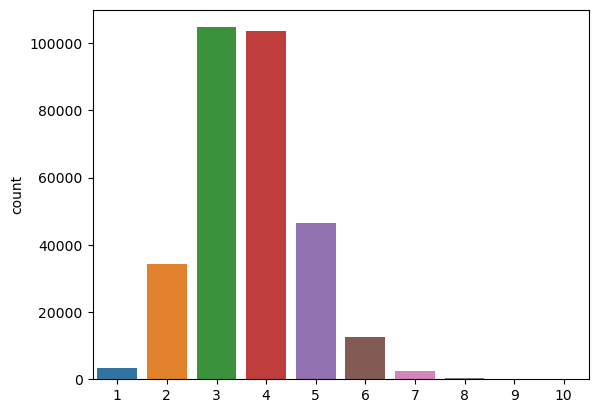

In [247]:
# Plot your results here as specified in the assignment description

_avg, _max = scc_shortest_paths(neurons)

In [242]:
len(neurons.nodes())

1781

In [245]:
print("avg: ", _avg)
print("max: ", _max)

avg:  3.666700246977772
max:  10


The distribution between the neurons dataset and les mis dataset for the shortest path between nodes is very similar. Both follow a somewhat normal distribution and both show that a shortest path of three edges is the most common shortest path.

### Part 4 - Topologically Ordered Languages [20 points]
### 4.1

In [267]:
language = nx.read_edgelist("language_data.txt",create_using=nx.DiGraph())

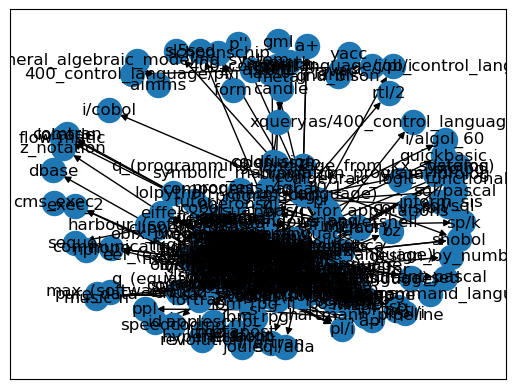

In [268]:
nx.draw_networkx(language, with_labels=True)

In [266]:
# Write a function that will determine if a graph is a DAG or not

def is_graph_dag(G):
    """
    Input:
    G: NetworkX graph object
    
    Returns:
    is_dag (Boolean): is the graph directed or not
    """
    
    # This is a placeholder
    is_dag = True
    is_dag = False
    
    return nx.is_directed_acyclic_graph(G)



In [269]:
is_graph_dag(language)

False

In [278]:
nx.find_cycle(language, orientation="original")[0][:2]

('dylan', 'eulisp')

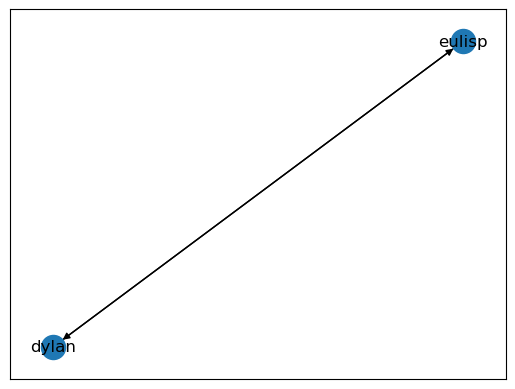

In [275]:
nx.draw_networkx(language.subgraph(['eulisp', 'dylan', 'forward']), with_labels=True)

It is not a DAG because there is at least one cycle in the graph, as seen above where dylan connects to eulisp and eulisp connects to dylan


### 4.2

In [279]:
# Implement a function that will remove the first edge of each cycle

def remove_cycles(G):
    """
    Input:
    G: NetworkX graph object
    
    Returns:
    G2: NetworkX graph object with cycles removed 
    
    """
    G2 = G
    
    loop = True
    while loop:
        try:
            cycle = nx.find_cycle(G2, orientation="original")
            edge = cycle[0][:2]
            G2.remove_edge(edge[0], edge[1])
        except Exception as e:
            loop = False
    
    return G2

In [280]:
lang2 = remove_cycles(language)
is_graph_dag(lang2)

True


### 4.3

In [295]:
# Write a function that returns the number of sources and the highest influencing node

def get_sources(G):
    """
    Inputs:
    G: NetworkX graph object
    
    Returns:
    num_sources (int): number of source nodes
    top_source (str): the name of the node with the highest level of influence
    """
    
    #These are placeholders
    num_sources = len([x for x in G.nodes() if G.in_degree(x)==0])
    
    _max = 0
    top_source = "George P. Burdell"
    for source in [x for x in G.nodes() if G.in_degree(x)==0]:
        if len(nx.descendants(G, source)) > _max:
            _max = len(nx.descendants(G, source))
            top_source = source
    
    
    return num_sources, top_source

In [296]:
get_sources(lang2)

(179, 'fantom')

In [288]:
list(nx.topological_sort(lang2))

['abap',
 'actionscript',
 'ada_2005',
 'aimms',
 'algebraic_logic_functional',
 'alice',
 'alma-0',
 'ampl',
 'antlr',
 'applescript',
 'argus',
 'as',
 'aspectj',
 'ateji_px',
 'autohotkey',
 'autolisp',
 'beanshell',
 'beta',
 'bistro',
 'bliss',
 'brainfuck',
 'c--',
 'c_omega',
 'candle',
 'cel_(programming_language)',
 'charm_(language)',
 'chuck',
 'cilk',
 'clacl',
 'clarion',
 'clean',
 'clojure',
 'co-array_fortran',
 'cobra',
 'coffeescript',
 'coldfusion',
 'colorforth',
 'comal',
 'component_pascal',
 'corvision',
 'csound',
 'curl',
 'curry',
 'dart',
 'dibol',
 'eulisp',
 'e',
 'ecmascript',
 'eel_(extensible_embeddable_language)',
 'epigram',
 'escher',
 'f-script',
 'f_sharp',
 'factor',
 'falcon',
 'fancy',
 'fantom',
 'adl',
 'hugo',
 'focal',
 'form',
 'fortress',
 'fpr',
 'free_pascal',
 'fril',
 'frink',
 'gambas',
 'game_maker_language',
 'gamemonkey_script',
 'generic_java',
 'genie',
 'gnu_bison',
 'gnu_e',
 'gnu_guile',
 'gofer',
 'go',
 'goo',
 'groovy',
 'ha

### Part 5 - Bipartite Projects of Github
### 5.1

In [312]:
# Write a function that will read in the github text file and return it as a NetworkX graph


def graph_from_text(filename="github_data.txt"):
    """
    Inputs
    
    filename: your github_data.txt file
    
    Returns:
    G: NetworkX graph object
    
    """
    
    file = open(filename, 'r')
    lines = file.readlines()
    G = nx.Graph()
    for line in lines:
        txt = line.replace(" \n","")
        edge = txt.split(" ")
        if edge[0] not in G:
            G.add_node(edge[0], node_type='user')
        if edge[1] not in G:
            G.add_node(edge[1], node_type='project')
        G.add_edge(edge[0], edge[1])
    
    return G
    
    

In [313]:
github = graph_from_text()

In [314]:
github.nodes(data=True)

NodeDataView({'1': {'node_type': 'user'}, '2': {'node_type': 'user'}, '3': {'node_type': 'user'}, '4': {'node_type': 'user'}, '5': {'node_type': 'user'}, '6': {'node_type': 'user'}, '7': {'node_type': 'user'}, '8': {'node_type': 'user'}, '9': {'node_type': 'user'}, '10': {'node_type': 'user'}, '11': {'node_type': 'user'}, '12': {'node_type': 'user'}, '13': {'node_type': 'user'}, '14': {'node_type': 'user'}, '15': {'node_type': 'user'}, '16': {'node_type': 'user'}, '17': {'node_type': 'user'}, '18': {'node_type': 'user'}, '19': {'node_type': 'project'}, '20': {'node_type': 'project'}, '21': {'node_type': 'project'}, '22': {'node_type': 'project'}, '23': {'node_type': 'project'}, '24': {'node_type': 'project'}, '25': {'node_type': 'project'}, '26': {'node_type': 'project'}, '27': {'node_type': 'project'}, '28': {'node_type': 'project'}, '29': {'node_type': 'project'}, '30': {'node_type': 'project'}, '31': {'node_type': 'project'}, '32': {'node_type': 'project'}, '33': {'node_type': 'proj

### 5.2

In [327]:
# Create a function to create the User-Project Matrix 

def calculated_projections(G):
    """
    Inputs:
    G: NetworkX graph object
    
    Returns:
    user_matrix: one mode projection for users
    project_matrix: one mode projection for projects
    """
    
    user_nodes = [x for x,y in G.nodes(data=True) if y['node_type']=='user']
    project_nodes = [x for x,y in G.nodes(data=True) if y['node_type']=='project']
    u = nx.bipartite.biadjacency_matrix(G, row_order = user_nodes, column_order = project_nodes)
    p = nx.bipartite.biadjacency_matrix(G, row_order = project_nodes, column_order = user_nodes)
    
    user_matrix = u @ u.T
    project_matrix = p @ p.T
    
    return user_matrix, project_matrix

In [329]:
u,p = calculated_projections(github)

/var/folders/51/n64xxfwj1k1797dd7bfbl6kr0000gn/T/ipykernel_93637/2901604218.py:15: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  u = nx.bipartite.biadjacency_matrix(G, row_order = user_nodes, column_order = project_nodes)
/var/folders/51/n64xxfwj1k1797dd7bfbl6kr0000gn/T/ipykernel_93637/2901604218.py:16: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  p = nx.bipartite.biadjacency_matrix(G, row_order = project_nodes, column_order = user_nodes)


In [333]:
u.todense()

matrix([[61,  0,  0, ...,  0,  0,  0],
        [ 0, 37,  0, ...,  0,  0,  0],
        [ 0,  0, 90, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ..., 32,  0,  0],
        [ 0,  0,  0, ...,  0, 37,  0],
        [ 0,  0,  0, ...,  0,  0,  8]])

### 5.3

In [336]:
# Write a function that will return the pair of users that share the highest number of Github projects between them.

def get_user_pair(M):
    """
    Inputs:
    M: projected matrix
    
    Returns:
    
    u1 (str) - first user
    u2 (str) - second user
    """
    
    u1 = "George123"
    u2 = "Burdell456"
    
    return u1, u2

### 5.4

In [337]:
# Write a function that will return the pair of projects that share the highest number of users between them.
def get_project_pair(G):
    """
    Inputs:
    G: projected matrix
    
    Returns:
    
    p1 (str) - first project
    p2 (str) - second project
    """
    
    p1 = "George123"
    p2 = "Burdell456"
    
    return p1, p2

### Submission Script

In [344]:
# DO NOT EDIT THIS CELL
import inspect
import json

def export_assignment():
    functions = []
    answers = []
    
    # Part 1
    # 1.1
    if practice_graphs and callable(practice_graphs):
        p_graphs = practice_graphs()
        functions.append(inspect.getsource(practice_graphs))
        
    # 1.2
    if create_toy_graphs and callable(create_toy_graphs):
        if calculate_leading_eigenvalue and callable(calculate_leading_eigenvalue):
            cycle, clique, star = create_toy_graphs()
            cycle_eig = calculate_leading_eigenvalue(cycle)
            clique_eig = calculate_leading_eigenvalue(clique)
            star_eig = calculate_leading_eigenvalue(star)
            functions.append(inspect.getsource(create_toy_graphs))
            functions.append(inspect.getsource(calculate_leading_eigenvalue))
            answers.append([cycle_eig, clique_eig, star_eig])
        
    if calculate_leading_eigenvalue and callable(calculate_leading_eigenvalue):
        leading_eig = calculate_leading_eigenvalue
    
    # 1.3
    if cities_map_analysis and callable(cities_map_analysis):
        G = nx.read_graphml("cities_data.graphml")
        node_count, edge_count, city_count = cities_map_analysis(G)
        functions.append(inspect.getsource(cities_map_analysis))
        answers.append([node_count, edge_count, city_count])
    
    # 1.4
    if cities_within_100 and callable(cities_within_100):
        city_list = ["Toledo, OH", "Stockton, CA", "San Francisco, CA"]
        city_subgraph = cities_within_100(G, city_list)
        functions.append(inspect.getsource(cities_within_100))
        
    
    # Part 2
    # 2.1
    G = nx.read_gml("lesmis_data.gml")
    if les_mis_connected and callable(les_mis_connected):
        lmc = les_mis_connected(G)
        functions.append(inspect.getsource(les_mis_connected))
        answers.append(lmc)
    
    # 2.2
    if calculate_average_paths and callable(calculate_average_paths):
        aspl, mspl = calculate_average_paths(G)
        functions.append(inspect.getsource(calculate_average_paths))
        answers.append([aspl,mspl])
        
    # 2.3
    if popular_characters and callable(popular_characters):
        top_3 = popular_characters(G)
        functions.append(inspect.getsource(popular_characters))
        answers.append(top_3)
    
    
    # Part 3
    # 3.1
    G = nx.read_graphml("drosophila_medulla_data.graphml")
    if weakly_connected and callable(weakly_connected):
        wccs, wpct = weakly_connected(G)
        functions.append(inspect.getsource(weakly_connected))
        answers.append([wccs,wpct])
    
    # 3.2
    if strongly_connected and callable(strongly_connected):
        sccs, spct = strongly_connected(G)
        functions.append(inspect.getsource(strongly_connected))
        answers.append([sccs,spct])
    
    # 3.3
    if scc_shortest_paths and callable(scc_shortest_paths):
        scc_aspl, scc_mspl = scc_shortest_paths(G)
        functions.append(inspect.getsource(scc_shortest_paths))
        answers.append([scc_aspl,scc_mspl])
    
    
    # Part 4
    
    G = nx.read_edgelist("language_data.txt", create_using=nx.DiGraph).reverse()
    # 4.1
    if is_graph_dag and callable(is_graph_dag):
        is_dag = is_graph_dag(G)
        functions.append(inspect.getsource(is_graph_dag))
        answers.append(is_dag)
    # 4.2
    if remove_cycles and callable(remove_cycles):
        g2 = remove_cycles(G)
        functions.append(inspect.getsource(remove_cycles))
    # 4.3
    if get_sources and callable(get_sources):
        num_sources, top_source = get_sources(G)
        functions.append(inspect.getsource(get_sources))
        answers.append([num_sources, top_source])
        
    
    # Part 5
    # 5.1
    
    if graph_from_text and callable(graph_from_text):
        G = graph_from_text("github_data.txt")
        functions.append(inspect.getsource(get_sources))
        
    # 5.2

    if calculated_projections and callable(calculated_projections):
        user_matrix, project_matrix = calculated_projections(G)
        functions.append(inspect.getsource(calculated_projections))
    
    # 5.3
    
    if get_user_pair and callable(get_user_pair):
        u1, u2 = get_user_pair(G)
        functions.append(inspect.getsource(get_user_pair))
        answers.append([u1, u2])
        
    # 5.4
    
    if get_project_pair and callable(get_project_pair):
        p1, p2 = get_project_pair(G)
        functions.append(inspect.getsource(get_project_pair))
        answers.append([p1, p2])
    
    
    with open(f"{gtid}_A1_answers.json", 'w') as ans:
        json.dump(answers, ans, indent=2)
        
    with open(f"{gtid}_A1.py", 'w') as funcs:
        funcs.write('\n'.join(functions))

['Toledo, OH', 'Stockton, CA', 'San Francisco, CA']
[('Toledo, OH', {}), ('Sandusky, OH', {}), ('Stockton, CA', {}), ('San Jose, CA', {}), ('San Francisco, CA', {}), ('Sacramento, CA', {}), ('Santa Rosa, CA', {})]


/var/folders/51/n64xxfwj1k1797dd7bfbl6kr0000gn/T/ipykernel_93637/3580068510.py:15: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, weight='value')
/var/folders/51/n64xxfwj1k1797dd7bfbl6kr0000gn/T/ipykernel_93637/2901604218.py:15: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  u = nx.bipartite.biadjacency_matrix(G, row_order = user_nodes, column_order = project_nodes)
/var/folders/51/n64xxfwj1k1797dd7bfbl6kr0000gn/T/ipykernel_93637/2901604218.py:16: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  p = nx.bipartite.biadjacency_matrix(G, row_order = project_nodes, column_order = user_nodes)


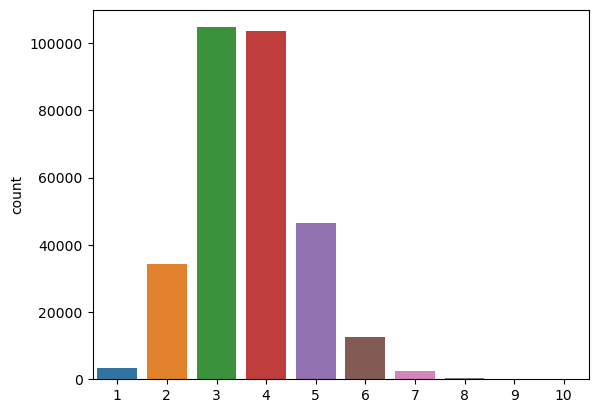

In [345]:
export_assignment()